In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import wquantiles
import statsmodels
import matplotlib.pyplot as plt

In [2]:
state = pd.read_csv("state.txt")
print(state['Population'].mean())
print(scipy.stats.trim_mean(state['Population'], 0.1))
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [3]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


In [4]:
state['Population'].std()

6848235.347401142

In [5]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
sm.robust.scale.mad(state['Population'])

3849876.1459979336

In [8]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

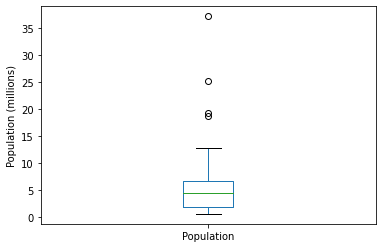

In [9]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [10]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Murder Rate (per 100,000)')

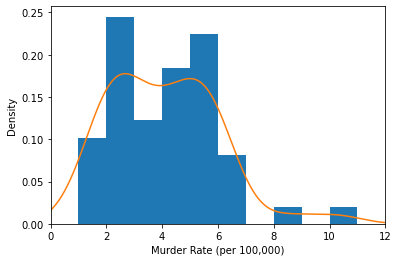

In [11]:
ax=state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [12]:
dfw = pd.read_csv("dfw_airline.csv")

Text(0, 0.5, 'Count')

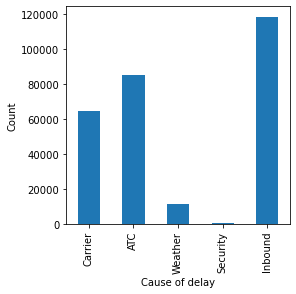

In [13]:
ax=dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

In [14]:
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [15]:
import seaborn as sns

In [16]:
sp500_px = pd.read_csv("sp500_data.csv")
sp500_sym = pd.read_csv("sp500_sectors.csv")

In [17]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
            sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

TypeError: Invalid comparison between dtype=int64 and str

In [18]:
kc_tax = pd.read_csv("kc_tax.csv")

In [19]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                      (kc_tax.SqFtTotLiving > 100) &
                      (kc_tax.SqFtTotLiving < 3500), :]

In [20]:
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

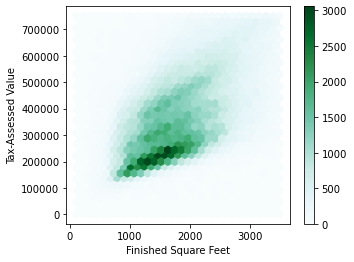

In [21]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving',
                         y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [22]:
lc_loans = pd.read_csv("lc_loans.csv")

In [24]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
df=crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off':'Late']=df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All']=df['All']/sum(df['All'])
perc_crosstab=df

In [25]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [26]:
airline_stats = pd.read_csv("airline_stats.csv")

Text(0.5, 0.98, '')

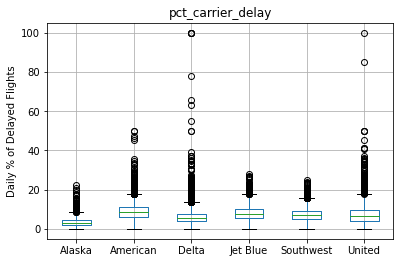

In [27]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

C:\Users\flyin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of Delayed Flights')

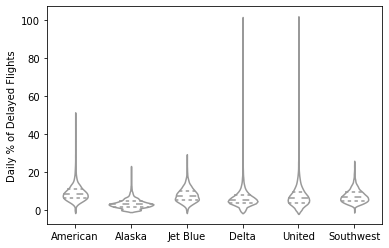

In [28]:
ax=sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

In [29]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


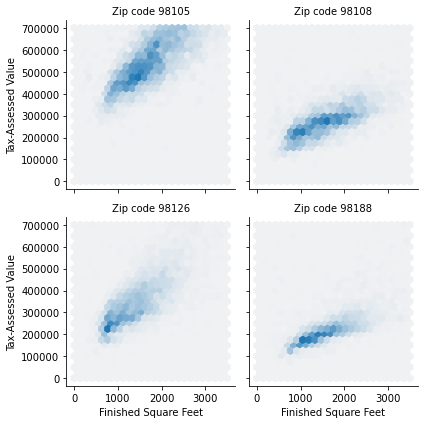

In [30]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g=sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')